# Introduction

This is a Python script to execute Fidimag simulations for box geometries. The initial purpose of this program was to simulate 2D films of Fe over Ir, which has an interfacial DMI and where skyrmions are stabilised using large anisotrpies and an external magnetic field perpendicular to the film plane and generally opposite to the skyrmion core.

The script was intended to run using Bash, but IPython has a nice **%run** magic to execute argument based Python scripts.
With the latest version of Matplotlib (>=1.4.3) it is possible to use interactive plots in the notebooks using the **nbagg** backend. Therefore, if we execute the script with the **--preview** option, a real time plot of the magnetisation dynamics is shown, for the top region of the system (in the $xy$ plane). If executed from a command line, it uses the **TKAgg** backend, in an external window (do not execute here with the **bash** magic since it has conflicts with the *nbagg* backend).

This script is based on **argparse**, thus the arguments can be obtained with the *--help* argument:

In [9]:
!python box_sim_fidimag.py --help

usage: film_sim_fidimag.py [-h] [--D D] [--A A] [--Ms MS] [--k_u K_U] [--B B]
                           [--Demag] [--PBC_2D]
                           (--initial_state_skyrmion_down SK_INITIAL_RADIUS | --initial_state_skyrmion_up SK_INITIAL_RADIUS | --initial_state_ferromagnetic_up | --initial_state_ferromagnetic_down | --initial_state_irregular)
                           [--preview] [--alpha ALPHA]
                           [--save_files SAVE_FILES]
                           [--stopping_dmdt STOPPING_DMDT]
                           [--max_steps MAX_STEPS] [--no_precession]
                           box_length box_width box_thickness fd_max_plane
                           fd_max_thick sim_name

NEB method for 2D films with interfacial DMI

positional arguments:
  box_length            Length in nm
  box_width             Width in nm
  box_thickness         Width in nm
  fd_max_plane          Maximum edge length for the finite differences along
                        the plane 

# Live Preview

Below we simulate a monolayer of Fe over Ir. This system is a 16 x 16 x 0.4 nm^3 film with Periodic Boundary Conditions ("infinite" system). The magnetic parameters are obtained from the experimental results of Romming et al. [Romming et al, PRL 114, **177203** (2015)]. The discretisation parameters are set as 0.4 nm in the plane and 1 monolayer (0.4 nm thick), which are the 4th and 5th arguments.

To get a skyrmion we turn off the precession (it is a metastable state and strangely, it does not converge well using the LLG precession). The initial skyrmion state has the core up and is 8 nm wide. We turn on the live preview using the corresponding option.

The rest of the parameters can be tuned using the argument list shown before. When executing this program, three folders will be created where the simulation files will be moved if the saving option was used.

In [5]:
SIMNAME="fidimag_2Dfilm_16nmx16nm_FePd-Ir111_B-15e-1T_fd1e-1_PBC_sk"

Using Backend: NBAgg
Using Periodic Boundary Conditions!
Simulating a 16.0 x 16.0 x 0.4 box
Number of elements in x-y-z directions:  40 40 1
Finite differences size in x-y-z directions:  0.4 0.4 0.4
Saturation Magnetisation: 1100000.0 A / m
Exchange constant: 2e-12  J m**-1
DMI constant: 3.9 * 1e-3  J m**-2
Anisotropy constant: 2500000.0  J m**-3
Zeeman field: (0, 0, -1193662.07319)  A / m
--------------------------------------


<IPython.core.display.Javascript object>


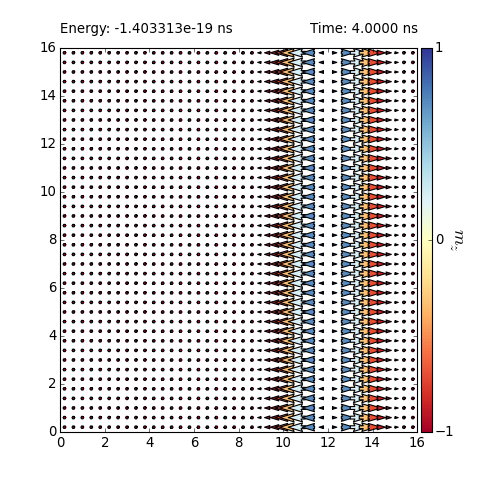

In [6]:
%run ./box_sim_fidimag.py 16 16 0.4 0.4 0.4 \
        "$SIMNAME" \
        --D 3.9 --B -1.5 \
        --A 2e-12 \
        --Ms 1.1e6 \
        --k_u 2.5e6 \
        --initial_state_irregular \
        --PBC_2D \
        --no_precession \
        --preview

In [ ]:
1 + 1